In [48]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('http://pycourse.s3.amazonaws.com/temperature.csv')

df = df.set_index('date')

display(df)

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [50]:
# extração de x e y

x = df[['temperatura']].values
y = df[['classification']].values

print('x:\n', x)
print('y:\n', y)

x:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [51]:
# pré= processamento

from sklearn.preprocessing import LabelEncoder

In [52]:
# converter y para valores numéricos

le = LabelEncoder()
y = le.fit_transform(y.ravel())
print('y:\n', y)

y:
 [3 2 3 3 0 1]


In [53]:
# modelo

from sklearn.linear_model import LogisticRegression

In [54]:
# classificador

clf = LogisticRegression()

clf.fit(x, y)


LogisticRegression()

In [55]:
# gerando 100 valores de temperatura
# linearmente espaçados entre 0 e 45
# predição para novos valores de temperatura

x_test = np.linspace(start=0, stop=45, num=100).reshape(-1, 1)

# predição desses valores

y_pred = clf.predict(x_test)

# print(y_pred)

In [56]:
# conversão de y_pred para valores originais

y_pred = le.inverse_transform(y_pred)
# print(y_pred)

In [57]:
# output

output = {'new_temp': x_test.ravel(), 'new_class': y_pred.ravel(),}
output = pd.DataFrame(output)

display(output)

,new_temp,new_class
0,0.000000,frio
1,0.454545,frio
2,0.909091,frio
3,1.363636,frio
4,1.818182,frio
...,...,...
95,43.181818,muito quente
96,43.636364,muito quente
97,44.090909,muito quente
98,44.545455,muito quente


In [58]:
# estatisticas

output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [59]:
# estatisticas

output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


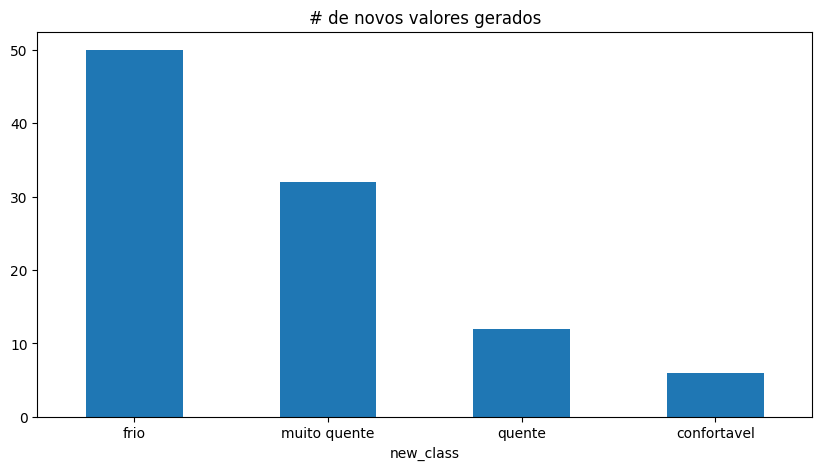

In [60]:
# contagem de valores gerados

output['new_class'].value_counts().plot.bar(figsize=(10, 5), rot=0, title= '# de novos valores gerados');

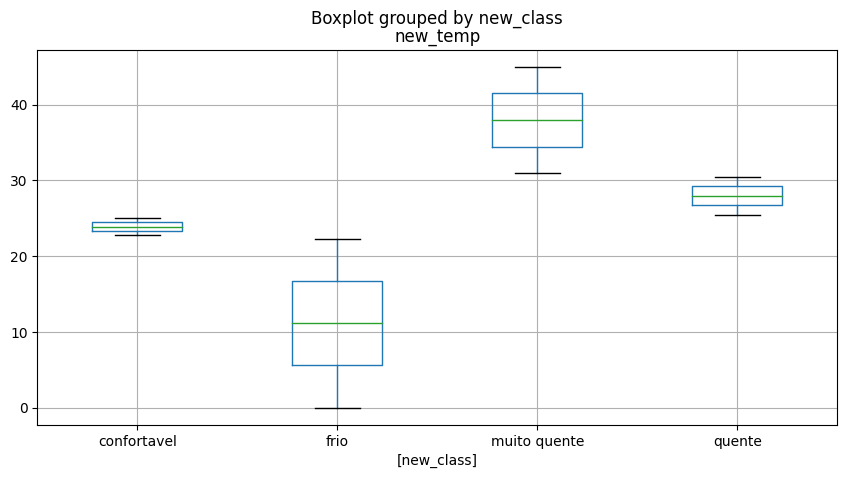

In [61]:
# distribuição de output produzido

output.boxplot(by='new_class', figsize=(10, 5));

Sistema automatico

In [62]:
def classify_temp():
    '''Classifica imput do usuario'''

    ask =True
    while ask:
        # imput de temperatura
        temp = input('Insira a temperatura (Celsius): ')

        # transformar para numpy array
        temp = np.array(float(temp)).reshape(-1,1)

        # realizar classificação
        class_temp = clf.predict(temp)

        # transformar inversa para retornar a string original
        class_temp = le.inverse_transform(class_temp)

        # classificação
        print(f'A classificação da temperatura {temp.ravel()[0]} é:', class_temp[0])

        # pregunta
        ask = input('Quer continuar [y/n]: ') == 'y'



In [63]:
# rodar codigo

classify_temp()

A classificação da temperatura 15.0 é: frio
A classificação da temperatura 35.0 é: muito quente
A classificação da temperatura 22.0 é: frio
A classificação da temperatura 25.0 é: confortavel
